# **Comparative Analysis Between Apriori and Fp Growth**

## **1. Data Preparation**

## Import Necessary Libraries:

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules


## Load and Explore the Dataset:

In [2]:
# Load the dataset
groceries = pd.read_csv("D:/datasets/Groceries_dataset.csv")
print(groceries.head())
print("::::::::::::::::::::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::::::::::::::::::::")
# Display the shape and first few rows of the dataset
print(groceries.shape)
print("::::::::::::::::::::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::::::::::::::::::::")
print("::::::::::::::::::::::::::::::::::::::::::::::")
print(groceries.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::
(38765, 3)
::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


## Transform Data into Transaction Format:

In [3]:
# Convert to list of lists format
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in groceries.groupby(['Member_number', 'Date'])]

## Transform Data to One-Hot Encoding Matrix:

In [4]:
# Instantiate the encoder
trans_encoder = TransactionEncoder()
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)
print(trans_encoder_matrix.head())

   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

## **2. Association Rules Implementation**

## Helper Function for Rule Calculation:

In [5]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    """
    Perform association rule calculation using Apriori or FP-Growth algorithms.
    """
    start_time = time.time()
    if rule_type == "apriori":
        rule_items = apriori(transact_items_matrix, min_support=min_support, use_colnames=True)
    else:
        rule_items = fpgrowth(transact_items_matrix, min_support=min_support, use_colnames=True)
    total_execution = time.time() - start_time
    print(f"Computed {rule_type.capitalize()}!")
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    return rule_items, total_execution

## Helper Function for Computing Association Rules:

In [6]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    """
    Compute association rules based on a given metric.
    """
    rules = association_rules(rule_matrix, metric=metric, min_threshold=min_thresh)
    return rules

## Helper Function for Plotting Metrics Relationship:

In [7]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    """
    Plot the relationship between two metrics.
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_func = np.poly1d(fit)
    plt.figure(figsize=(10, 6))
    plt.scatter(rule_matrix[col1], rule_matrix[col2], color='blue', alpha=0.5)
    plt.plot(rule_matrix[col1], fit_func(rule_matrix[col1]), color='red')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')
    plt.grid(True)
    plt.show()

## Helper Function for Comparing Execution Times:

In [8]:
def compare_time_exec(algo1, algo2):
    """
    Compare execution times between two algorithms.
    """
    execution_times = [algo1[1], algo2[1]]
    algo_names = [algo1[0], algo2[0]]
    plt.figure(figsize=(8, 5))
    y = np.arange(len(algo_names))
    plt.bar(y, execution_times, color=['orange', 'blue'])
    plt.xticks(y, algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time (seconds)')
    plt.title("Execution Time Comparison")
    plt.show()

## **3. Running the Algorithms and Analysis**

## Run FP-Growth Algorithm:

In [9]:
# Run FP-Growth algorithm
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="fpgrowth")
print(f"FP-Growth execution took: {fp_growth_exec_time} seconds")

Computed Fpgrowth!
FP-Growth execution took: 0.11981368064880371 seconds


## Compute and Plot Lift and Confidence for FP-Growth:

                antecedents               consequents  antecedent support  \
0      (yogurt, whole milk)              (rolls/buns)            0.011161   
1      (yogurt, rolls/buns)              (whole milk)            0.007819   
2  (rolls/buns, whole milk)                  (yogurt)            0.013968   
3                  (yogurt)  (rolls/buns, whole milk)            0.085879   
4              (whole milk)      (yogurt, rolls/buns)            0.157923   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.110005  0.001337    0.119760  1.088685  0.000109    1.011083   
1            0.157923  0.001337    0.170940  1.082428  0.000102    1.015701   
2            0.085879  0.001337    0.095694  1.114293  0.000137    1.010854   
3            0.013968  0.001337    0.015564  1.114293  0.000137    1.001622   
4            0.007819  0.001337    0.008464  1.082428  0.000102    1.000650   

   zhangs_metric  
0       0.082380  
1       0.076751  
2    

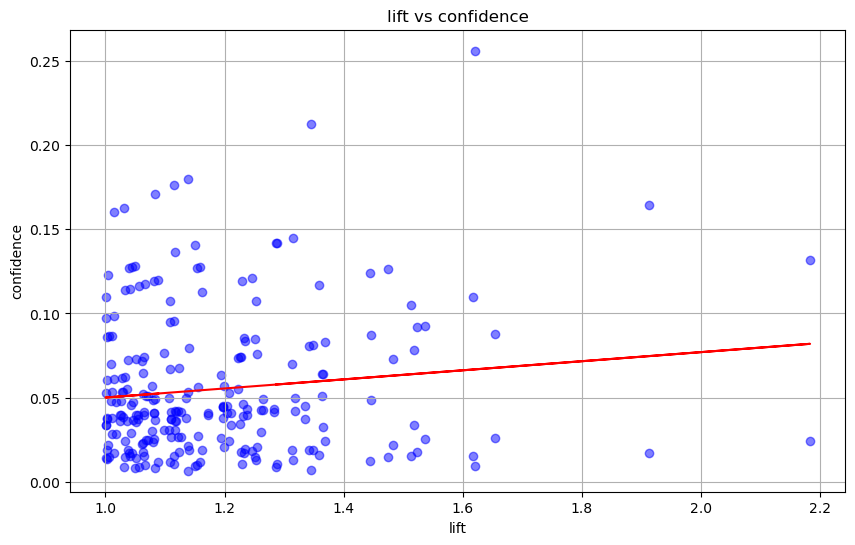

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
             antecedents   consequents  antecedent support  \
0      (sausage, yogurt)  (whole milk)            0.005748   
1  (sausage, rolls/buns)  (whole milk)            0.005347   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.157923  0.001470    0.255814  1.619866  0.000563    1.131541   
1            0.157923  0.001136    0.212500  1.345594  0.000292    1.069304   

   zhangs_metric  
0       0.384877  
1       0.258214  


In [10]:
# Compute association rules using lift
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix, metric="lift")
print(fp_growth_rule_lift.head())
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

print(":::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")

# Compute association rules using confidence
fp_growth_rule_confidence = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
print(fp_growth_rule_confidence.head())

## Run Apriori Algorithm:

In [11]:
# Run Apriori algorithm
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print(f"Apriori execution took: {apriori_exec_time} seconds")

Computed Apriori!
Apriori execution took: 1.9799613952636719 seconds


## Compute and Plot Lift and Confidence for Apriori:

        antecedents       consequents  antecedent support  consequent support  \
0        (UHT-milk)  (tropical fruit)            0.021386            0.067767   
1  (tropical fruit)        (UHT-milk)            0.067767            0.021386   
2     (brown bread)            (beef)            0.037626            0.033950   
3            (beef)     (brown bread)            0.033950            0.037626   
4            (beef)    (citrus fruit)            0.033950            0.053131   

    support  confidence      lift      leverage  conviction  zhangs_metric  
0  0.001537    0.071875  1.060617  8.785064e-05    1.004426       0.058402  
1  0.001537    0.022682  1.060617  8.785064e-05    1.001326       0.061307  
2  0.001537    0.040853  1.203301  2.597018e-04    1.007196       0.175559  
3  0.001537    0.045276  1.203301  2.597018e-04    1.008012       0.174891  
4  0.001804    0.053150  1.000349  6.297697e-07    1.000020       0.000361  


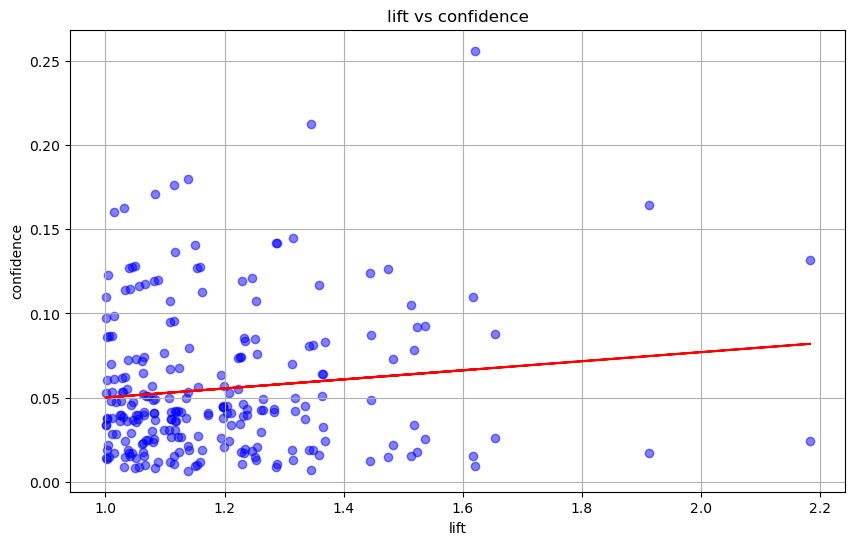

             antecedents   consequents  antecedent support  \
0  (sausage, rolls/buns)  (whole milk)            0.005347   
1      (sausage, yogurt)  (whole milk)            0.005748   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.157923  0.001136    0.212500  1.345594  0.000292    1.069304   
1            0.157923  0.001470    0.255814  1.619866  0.000563    1.131541   

   zhangs_metric  
0       0.258214  
1       0.384877  


In [12]:
# Compute association rules using lift for Apriori
apriori_rule_lift = compute_association_rule(apriori_matrix, metric="lift")
print(apriori_rule_lift.head())

# Plot Lift vs Confidence for Apriori
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

# Compute association rules using confidence for Apriori
apriori_rule_confidence = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
print(apriori_rule_confidence.head())


## **Code to Compare Execution Time**

Computed Fpgrowth!
FP-Growth execution took: 0.1816105842590332 seconds
Computed Apriori!
Apriori execution took: 2.1008360385894775 seconds


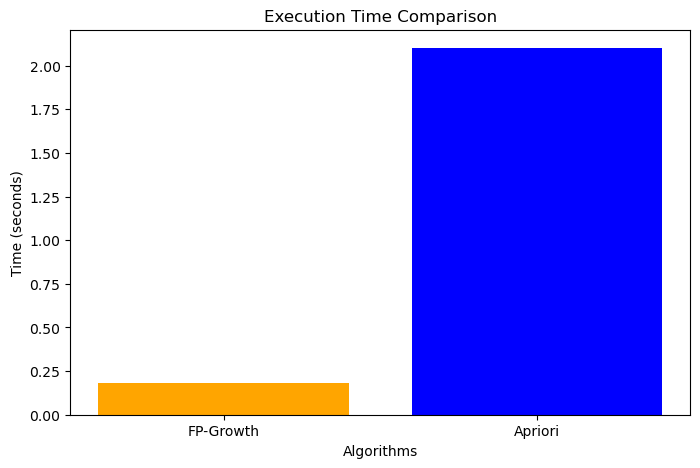

In [13]:
# Run FP-Growth algorithm
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="fpgrowth")
print(f"FP-Growth execution took: {fp_growth_exec_time} seconds")

# Run Apriori algorithm
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print(f"Apriori execution took: {apriori_exec_time} seconds")

# Compare execution times
compare_time_exec(['FP-Growth', fp_growth_exec_time], ['Apriori', apriori_exec_time])
